<a href="https://colab.research.google.com/github/rhemzypm/CheatSheets-for-Developers/blob/main/SIFT_BASED_FEATURING_MACHINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [11]:
img1 = cv.imread('lapangan.jpeg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('lapangan-bola-hd.jpg',cv.IMREAD_GRAYSCALE) # trainImage

In [5]:
sift = cv.SIFT_create()

In [12]:
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [14]:
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

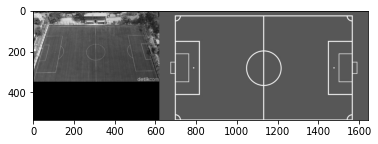

(<matplotlib.image.AxesImage at 0x7f6ae9dcffd0>, None)

In [15]:
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

In [16]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [19]:
img1 = cv.imread('lapangan.jpeg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('lapangan-bola-hd.jpg',cv.IMREAD_GRAYSCALE) # trainImage

In [20]:
sift = cv.SIFT_create()

In [21]:
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [24]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50) 

In [25]:
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

In [26]:
matchesMask = [[0,0] for i in range(len(matches))]

for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)


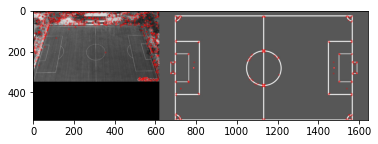

(<matplotlib.image.AxesImage at 0x7f6ae8e2fad0>, None)

In [27]:
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()